<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

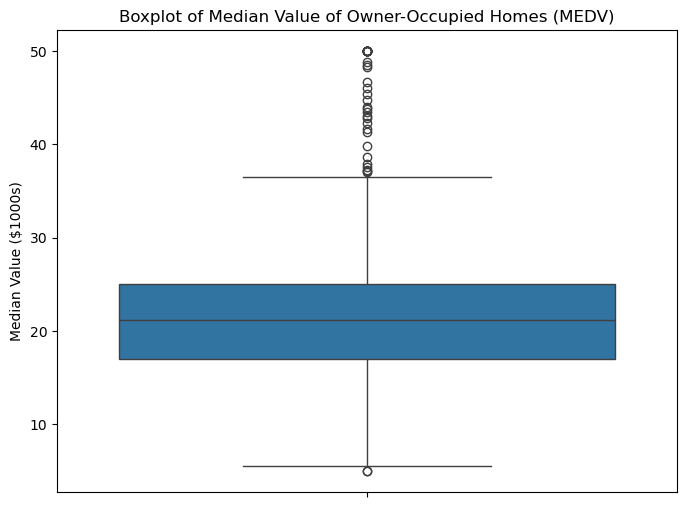

In [14]:
# --- Boxplot for Median Value of Owner-Occupied Homes ---
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.show()

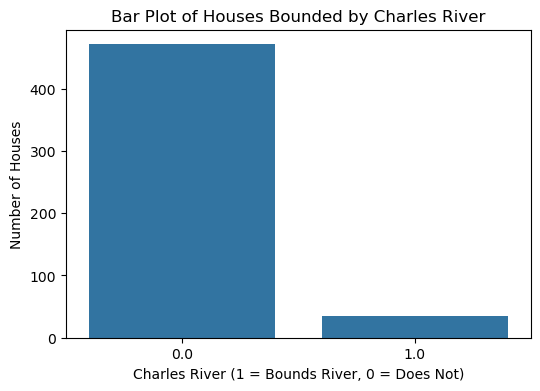

In [16]:
# --- Bar Plot for Charles River Variable ---
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Houses Bounded by Charles River')
plt.xlabel('Charles River (1 = Bounds River, 0 = Does Not)')
plt.ylabel('Number of Houses')
plt.show()

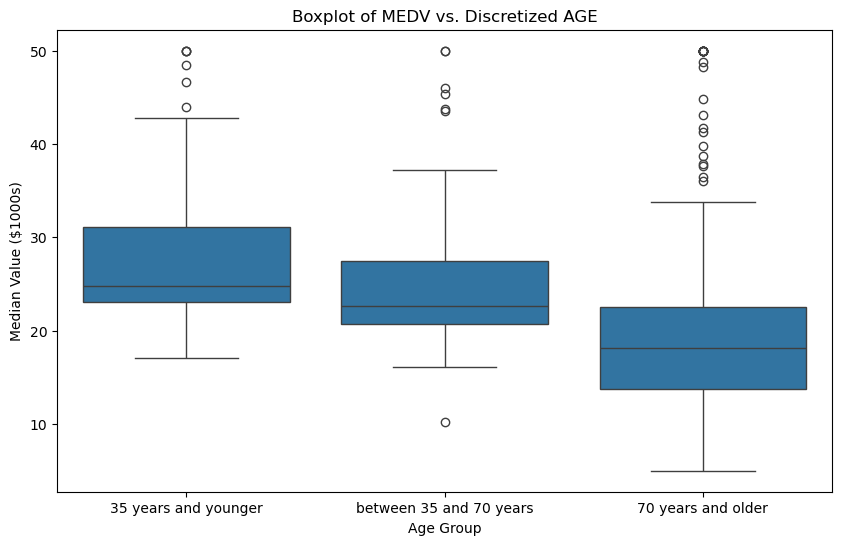

In [28]:
# --- Boxplot for MEDV vs. AGE (Discretized) ---
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs. Discretized AGE')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

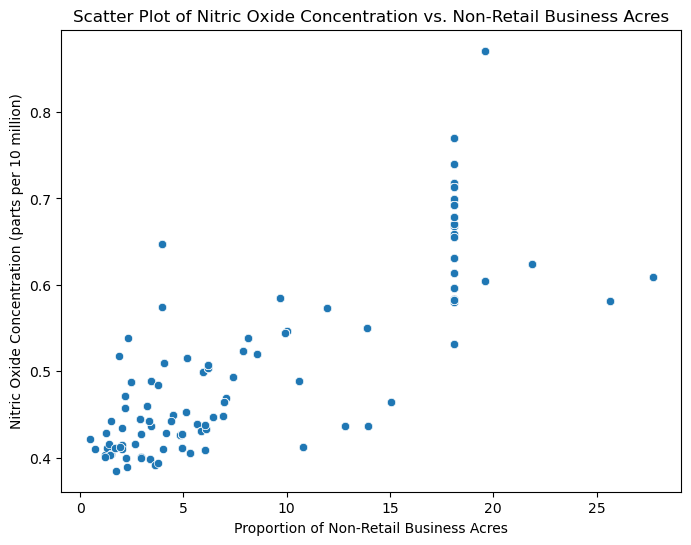

In [30]:
# --- Scatter Plot for Nitric Oxide vs. Non-Retail Business Acres ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentration vs. Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres')
plt.ylabel('Nitric Oxide Concentration (parts per 10 million)')
plt.show()

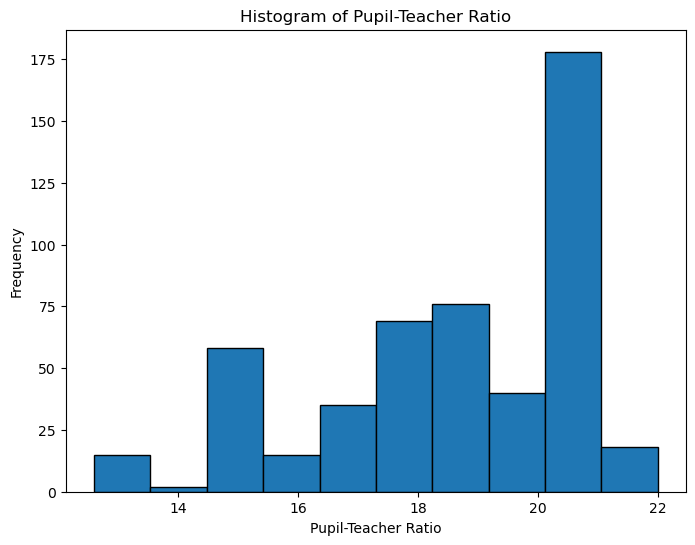

In [32]:
# --- Histogram for Pupil-Teacher Ratio ---
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


Question 1: Significant Difference in Median Value of Houses Bounded by the Charles River


Here's a breakdown of the hypothesis tests for each question, using a significance level of α = 0.05:

Question 1: Significant Difference in Median Value of Houses Bounded by the Charles River

Hypothesis:
Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River.
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River.

In [34]:
# Separate the data into two groups
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

In [40]:
# Perform the t-test
t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

In [42]:
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: 3.996
P-value: 0.000


T-statistic: 3.996

This indicates that the difference between the means of the two groups (houses near the Charles River vs. not near the river) is approximately 3.996 standard errors away from zero. A larger t-statistic suggests a larger difference between the groups.

P-value: 0.000

This p-value is very small (less than 0.05). It means that if there were truly no difference in median house values between the two groups, there's a very low probability (almost 0%) of observing a difference as extreme as the one we found in our sample.

Conclusion:

Since the p-value (0.000) is less than our significance level (α = 0.05), we reject the null hypothesis. We have strong evidence to conclude that there is a significant difference in the median value of houses bounded by the Charles River compared to those that are not.

In simpler terms, houses near the Charles River tend to have a different median value (likely higher, given the positive t-statistic) than houses that are not near the river.

Question 2: Difference in Median Values of Houses (MEDV) for each Proportion of Owner Occupied Units Built Prior to 1940 (AGE)

Hypothesis:
Null Hypothesis (H0): There is no difference in median house values across different age groups.
Alternative Hypothesis (H1): There is a difference in median house values across different age groups.

In [44]:
# Perform ANOVA
f_stat, p_value = stats.f_oneway(
    boston_df['MEDV'][boston_df['AGE_Group'] == '35 years and younger'],
    boston_df['MEDV'][boston_df['AGE_Group'] == 'between 35 and 70 years'],
    boston_df['MEDV'][boston_df['AGE_Group'] == '70 years and older']
)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

F-statistic: 36.408
P-value: 0.000


F-statistic: 36.408

This F-statistic indicates that there is a substantial amount of variation between the group means (median house values for the different age groups) relative to the variation within each group. A larger F-statistic suggests a greater difference between the groups.

P-value: 0.000

This p-value is very small (less than 0.05). It means that if there were truly no difference in median house values between the different age groups, there's a very low probability (almost 0%) of observing differences as extreme as the ones we found in our sample.

Conclusion:

Since the p-value (0.000) is less than our significance level (α = 0.05), we reject the null hypothesis. We have very strong evidence to conclude that there is a significant difference in median house values across the different age groups of houses.

Question 3: Relationship Between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres per Town

Hypothesis:
Null Hypothesis (H0): There is no correlation between nitric oxide concentrations and the proportion of non-retail business acres.   
Alternative Hypothesis (H1): There is a correlation between nitric oxide concentrations and the proportion of non-retail business acres.

In [48]:
# Calculate the correlation coefficient and p-value
correlation_coef, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson Correlation Coefficient: 0.764
P-value: 0.000


Pearson Correlation Coefficient: 0.764

This indicates a strong positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). As the proportion of non-retail business acres increases, nitric oxide concentrations tend to increase as well.

P-value: 0.000

This p-value is very small (less than 0.05). It means that if there were truly no correlation between these two variables, the probability of observing a correlation as strong as 0.764 in our sample is extremely low (almost 0%).

Conclusion:

Since the p-value (0.000) is less than our significance level (α = 0.05), we reject the null hypothesis. We have very strong evidence to conclude that there is a significant positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per

 town.

Question 4: Impact of Weighted Distance to Employment Centers on Median Home Value

Hypothesis:
Null Hypothesis (H0): The weighted distance to employment centers has no impact on the median value of owner-occupied homes.
Alternative Hypothesis (H1): The weighted distance to employment centers has an impact on the median value of owner-occupied homes.

In [74]:
# Define the independent and dependent variables
X = boston_df['DIS']  # Independent variable
y = boston_df['MEDV']  # Dependent variable

In [76]:
# Add a constant to the independent variable (for the intercept term)
X = sm.add_constant(X)

In [78]:
# Create the linear regression model
model = sm.OLS(y, X).fit()

In [80]:
# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        20:29:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

1. Overall Model Fit

R-squared: 0.062 This means that approximately 6.2% of the variation in median home values (MEDV) can be explained by the weighted distance to the five Boston employment centers (DIS). This is a relatively low R-squared value, suggesting that distance alone doesn't explain a large portion of the variation in house prices.
Adjusted R-squared: 0.061 Similar to R-squared, but adjusted for the number of variables in the model.
F-statistic: 33.58 This tests the overall significance of the model. The associated p-value (1.21e-08) is very low, indicating that the model is statistically significant.
2. Coefficients

const (Intercept): 18.3901 This is the estimated median home value (MEDV) when the weighted distance to employment centers (DIS) is zero. (Note: This might not have a practical interpretation in this case, as a distance of zero might not be realistic.)
DIS: 1.0916 This is the key coefficient. It indicates that for every one unit increase in the weighted distance to employment centers, the median home value is estimated to increase by $1,091.60 (since MEDV is in $1000s). This suggests a positive relationship between distance and home value.
P-values (P>|t|) The p-values for both the constant and DIS are very small (0.000), indicating that both coefficients are statistically significant.
3. Other Statistics

Omnibus, Prob(Omnibus), Skew, Kurtosis: These statistics test the normality of the residuals (errors) in the model. The significant Prob(Omnibus) and high skewness/kurtosis suggest that the residuals might not be perfectly normally distributed.
Durbin-Watson: This tests for autocorrelation in the residuals. A value of 0.570 is quite low, suggesting potential positive autocorrelation (which means the errors might not be independent).
Conclusion:

The regression analysis indicates that there is a statistically significant positive relationship between the weighted distance to employment centers and the median value of owner-occupied homes in Boston. However, distance alone explains only a small portion of the variation in house prices.